# Imports and Custom Functions writen for convenience

## Importing Libraries

In [1]:
from rank_bm25 import BM25Okapi, BM25Plus, BM25L
from newap import average_precision
import json
import numpy as np
import matplotlib.pyplot as plt
import time

## Custom Functions and Location of data folder

In [2]:
loc = "../refining_seriously/"
def namestr(obj, namespace = globals()):
	return [name for name in namespace if namespace[name] is obj][0]
def print_json(query, n = 3, m = 5, k=6):
	n = 3
	print(f"{namestr(query)} ="+"{\n", end="")  # start of the json
	l = sorted(list(query.keys()),
			key=lambda x: int(x[k:]))
	for QID in l[:n]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	for i in range(2): print("\t...")
	for QID in l[-n:]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	print("}")  # end of the json

## Importing Data

In [3]:
# "cases.json" has the query and the doc_id of the relevant documents
with open(loc+"cases.json") as f:
    prior_cases = json.load(f)
print_json(prior_cases, k=1)

prior_cases ={
	"C1": ['of', 'of', 'no', 'of', 'the', ......],
	"C2": ['and', 'of', 'a', 'no', 'of', ......],
	"C3": ['of', 'and', 'of', 'no', 'of', ......],
	...
	...
	"C2912": ['of', 'of', 'a', 'no', 'of', ......],
	"C2913": ['of', 'm', 'and', 'of', 'no', ......],
	"C2914": ['of', 'of', 'no', 'of', 'the', ......],
}


In [4]:
# "Query_doc.json" has all the queries (X)
with open(loc+"Query_doc.json") as f:
    query = json.load(f)
print_json(query)

query ={
	"AILA_Q1": ['the', 'on', 'wa', 'as', 'an', ......],
	"AILA_Q2": ['the', 'befor', 'wa', 'as', 'in', ......],
	"AILA_Q3": ['thi', 'from', 'the', 'of', 'the', ......],
	...
	...
	"AILA_Q48": ['is', 'to', 'in', 'of', 'is', ......],
	"AILA_Q49": ['wa', 'a', 'at', 'in', 'the', ......],
	"AILA_Q50": ['a', 'of', 'thi', 'by', 'is', ......],
}


In [5]:
# "answers.json" has the relevant documents (Y)
with open(loc+"answers.json") as f:
    answers = json.load(f)
print_json(answers, 3, 1)

answers ={
	"AILA_Q1": ['C14', ......],
	"AILA_Q2": ['C27', ......],
	"AILA_Q3": ['C1', ......],
	...
	...
	"AILA_Q48": ['C82', ......],
	"AILA_Q49": ['C174', ......],
	"AILA_Q50": ['C27', ......],
}


# Getting BM25 Scores

In [6]:
# sorted list of all prior cases, corpus_index = ["C1", "C2", ..., "C2914"]
corpus_index = sorted(list(prior_cases.keys()),
                          key=lambda x: int(x[1:]))

# 2D list containing prior cases in order as in corpus_index
tokenized_corpus = [prior_cases[doc_id] for doc_id in corpus_index]

# sorted list of all queries, query_index = ["AILA_Q1", "AILA_Q2", ..., "AILA_Q59"]
query_index = sorted(list(query.keys()),
                     key=lambda x: int(x[6:]))

In [7]:
tx0 = time.time()
bm25 = BM25Okapi(tokenized_corpus, k1 = 0.5)
print("1 -", time.time()-tx0)
sum = 0
for i, Q in enumerate(query_index):
    tx0 = time.time()
    doc_scores = bm25.get_scores(query[Q])
    sum += average_precision(doc_scores, answers[Q])
    print("\t", i, "-", time.time()-tx0)
    # print(Q)
MeanAP = sum/len(query_index)
MeanAP*100

1 - 0.7622771263122559
	 0 - 0.6523864269256592
	 1 - 0.3715372085571289
	 2 - 0.20136308670043945
	 3 - 0.4372844696044922
	 4 - 0.41921353340148926
	 5 - 0.3629748821258545
	 6 - 0.22081828117370605
	 7 - 0.42049407958984375
	 8 - 0.5009210109710693
	 9 - 0.293903112411499
	 10 - 0.5774061679840088
	 11 - 0.21657156944274902
	 12 - 0.4351990222930908
	 13 - 0.32662105560302734
	 14 - 0.46430015563964844
	 15 - 0.4405362606048584
	 16 - 0.4480874538421631
	 17 - 0.2822294235229492
	 18 - 0.4857821464538574
	 19 - 0.30076169967651367
	 20 - 0.38554811477661133
	 21 - 0.512845516204834
	 22 - 0.4830200672149658
	 23 - 0.650902271270752
	 24 - 0.3843696117401123
	 25 - 0.7384352684020996
	 26 - 0.3662114143371582
	 27 - 0.22999095916748047
	 28 - 0.5417287349700928
	 29 - 0.47960782051086426
	 30 - 0.39629673957824707
	 31 - 0.2515573501586914
	 32 - 0.42483043670654297
	 33 - 0.5976319313049316
	 34 - 0.6231865882873535
	 35 - 0.4937899112701416
	 36 - 0.38575196266174316
	 37 - 0.24852

0.48750485018316575

In [8]:
# Yk = {}
# for k in range(70, 71, 10):
#     print(f"\t\tk = {k}")
# X = np.arange(0.01, 2, 0.2)
X = {x:None for x in np.arange(1, 5, 0.01)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=100, b = var, epsilon=0.095) # defaults are k1=1.2, b=0.75, epsilon=0.25
    # confirmed: epsilon to be near 0.09 to 0.1 inclusive so, 0.095 best
    # confirmed: k1 100 best
    # b = 1.38 best MeanAP = 2.47
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######
    
    # Yk[k] = Y
    # print("\n\n\nNext Lap")

epsilon = 1.0 -> MeanAP = 0.00681079790259733
took 20.43354868888855 seconds
average time taken per file = 20.43354868888855 seconds
percentage done = 0.25%
estimated time remaining = 8152.985926866531 sec = 135.88309878110886 min
total elapsed time = 20.43354868888855 seconds

epsilon = 1.01 -> MeanAP = 0.00726765406767272
took 20.060131072998047 seconds
average time taken per file = 20.2468398809433 seconds
percentage done = 0.5%
estimated time remaining = 8058.242272615433 sec = 134.30403787692387 min
total elapsed time = 40.4936797618866 seconds

epsilon = 1.02 -> MeanAP = 0.007757412373485772
took 20.390021562576294 seconds
average time taken per file = 20.294901371002197 seconds
percentage done = 0.75%
estimated time remaining = 8057.075844287872 sec = 134.28459740479786 min
total elapsed time = 60.88470411300659 seconds

epsilon = 1.03 -> MeanAP = 0.008062774788500697
took 20.610591173171997 seconds
average time taken per file = 20.37407374382019 seconds
percentage done = 1.0%
e

In [ ]:
a = list(X.keys())
m = max(X.values(), )
print(f"f({a[list(X.values()).index(m)]}) = {m*100}%")

TypeError: '>' not supported between instances of 'int' and 'dict_values'

In [ ]:
max(X.values())*100

3.015895237913638

In [ ]:
X[list(X.values()).index(max(X.values()))]

1.3800000000000001

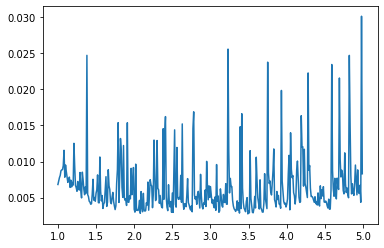

In [ ]:
plt.plot(X.keys(), X.values())